# B(M1) analysis

Collect proton/neutron M1 matrix elements from runs using random samples of USDB

$ B(M1) = \left[ g_s^p M_s^p + g_l^p M_l^p +  g_s^n M_s^n + g_l^n M_l^n  \right] ^2$ 

Free nucleon values:

$g_s^p = 5.5857$

$g_s^n = -3.8263 $

$g_l^p = 1.0 $

$g_l^n = 0.0 $ 



In [1]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import pickle as pkl

import sys
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [2]:
from scipy.special import factorial2

hbarc = 197300 #keV fm
hbar = 6.582E-19 #keV s
alpha = 1/137
mP = 938272 # kev/c^2
#muN = 3.152E-14 # MeV / T
muN2 =  alpha*hbarc**3*2*mP**-2 # nuclear magneton squared


def Thalf_width(E): #converts energy width (MeV) to Thalf in seconds
    return hbar * np.log(2)/(E/1000)

def Thalf_width_kev(E):
    if E==0.:
        return None
    return Thalf_width(E)

def times_so_far(ls):
    out = [0]*len(ls)
    for i in range(len(ls)):
        out[i] = ls[:i+1].count(ls[i])
    return out

def j_to_twoj(x):
    if '/2' in x:
        return int(x.strip('/2'))
    else:
        return 2*int(x.strip('()'))
    
def thalf_units_to_sec(units,value):
    m=0
    if units=='PS':
        m = 10**-12
    elif units=='NS':
        m = 10**-9
    elif units=='FS':
        m = 10**-15
    elif units=='US':
        m = 10**-6
    elif units=='AS':
        m = 10**-18
    elif units=='KEV':
        pass
    if m==0:
        return Thalf_width_kev(value)
    else:
        return m*value
    
def fLambda(l):
    return 8*np.pi*(l+1)/(l*(factorial2(2*l+1)**2))

def Bweisskopf(l,A):
    # Weisskopf estimate for El
    return (1/(4*np.pi)) * (3/(3+l))**2 * (1.2*A**(1/3))**(2*l)
    
def B_M1_Wu(B):
    return B / 1.79

In [3]:
path_to_input_csv = '/p/lustre2/fox39/shmuq/usdb/shmuq_m1/sd_M1_processed.csv'
path_to_usdb_csv = '/p/lustre2/fox39/shmuq/usdb/shmuq_m1/sd_M1_usdb.csv'
df_input = pd.read_csv(path_to_input_csv)
df_usdb = pd.read_csv(path_to_usdb_csv)

In [4]:
df_usdb

,Unnamed: 0,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.4400,0.1400,2,18.4 FS 2,1938.0000,0.0000,87.600,0.700,M1,0.1400,0.0200,4,18.400,FS,2.000,1.840000e-14,2.000000e-15,0.250669,0.035810,18O,2,4,2,1,True,0.0000,-0.0900,0.0000,0.0900
1,2,18,O,8,10,5254.8000,0.9000,2,7.0 FS 0.3,1334.0000,0.0000,8.700,0.400,M1,0.1110,0.0080,4,7.000,FS,0.300,7.000000e-15,3.000000e-16,0.198745,0.014324,18O,2,4,3,2,True,0.0000,0.1849,0.0000,-0.1849
2,4,19,O,8,11,96.0000,0.5000,3/2,1.39 NS 0.05,96.0000,0.0000,100.000,0.000,M1,0.0880,0.0380,3,1.390,NS,0.050,1.390000e-09,5.000000e-11,0.157563,0.068039,19O,5/2,5,1,1,True,0.0000,-0.0439,0.0000,0.0439
3,6,18,F,9,9,1700.8100,0.1800,1,662 FS 19,659.0000,0.0000,70.200,1.300,M1,0.0805,0.0027,2,662.000,FS,19.000,6.620000e-13,1.900000e-14,0.144135,0.004834,18F,0,0,2,1,True,0.0268,-0.0268,0.3135,-0.3135
4,12,18,F,9,9,3839.1700,0.2200,2,13.2 FS 1.9,777.0000,0.0000,50.000,3.000,M1,1.7000,0.3000,4,13.200,FS,1.900,1.320000e-14,1.900000e-15,3.043838,0.537148,18F,2,4,3,2,True,0.1563,-0.1563,0.3789,-0.3789
5,13,18,F,9,9,4115.9000,0.2500,3,63 FS 15,1054.0000,0.0000,95.000,3.000,M1,0.2800,0.0700,6,63.000,FS,15.000,6.300000e-14,1.500000e-14,0.501338,0.125335,18F,2,4,3,2,True,-0.1040,0.1040,-0.1876,0.1876
6,14,18,F,9,9,4360.1500,0.2600,1,19 FS 7,1298.0000,0.0000,100.000,0.000,M1,0.5000,0.2000,2,19.000,FS,7.000,1.900000e-14,7.000000e-15,0.895247,0.358099,18F,2,4,4,2,True,0.1352,0.1352,-0.1352,-0.1352
7,15,18,F,9,9,5297.6000,1.5000,4,21 FS 3,646.0000,0.0000,1.300,0.300,M1,0.0190,0.0090,8,21.000,FS,3.000,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1606,0.1606,0.0920,-0.0920
8,16,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,2047.0000,0.0000,1.500,0.300,M1,0.0780,0.0330,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.139658,0.059086,18F,3,6,4,3,True,-0.0149,0.0149,-0.0706,0.0706
9,17,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,3640.0000,0.0000,5.500,0.400,M1,0.0520,0.0170,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.093106,0.030438,18F,2,4,4,1,True,-0.0125,0.0125,0.1954,-0.1954


In [5]:
idx = df_usdb[(df_usdb['Mth_sp']==-999.0) | (df_usdb['Mth_lp']==-999.0) | (df_usdb['Mth_sn']==-999.0) | (df_usdb['Mth_ln']==-999.0)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['Mth_sp']==0.0) & (df_usdb['Mth_lp']==0.0) & (df_usdb['Mth_sn']==0.0) & (df_usdb['Mth_ln']==0.0)].index
df_usdb.loc[idx,'Include']=False

B_min = 0.01
n_max = 6
idx = df_usdb[(df_usdb['ni']>n_max) | (df_usdb['nf']>n_max)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['B_exp (W.u.)']<B_min)].index
df_usdb.loc[idx,'Include']=False

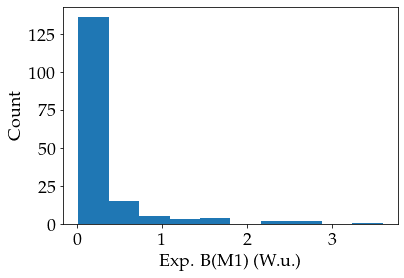

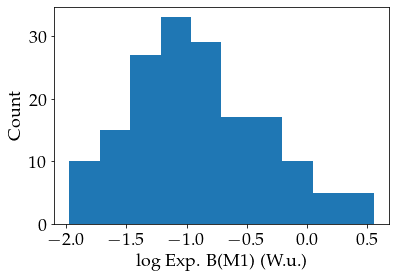

Out of 168 transitions, 155 are smaller than the Weisskopf estimate


In [6]:
y = df_usdb['B_exp (W.u.)']
plt.hist(y, bins=10, density=False)
plt.xlabel('Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()

y = np.log10(df_usdb['B_exp (W.u.)'])
plt.hist(y, bins=10, density=False)
plt.xlabel('log Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()
print(f'Out of {len(y)} transitions, {len(y[y<0])} are smaller than the Weisskopf estimate')

In [7]:
df_input = df_input.rename(columns={'Unnamed: 0':'Index'})
df_usdb = df_usdb.rename(columns={'Unnamed: 0':'Index'})

In [8]:
df_input = df_input[df_input['Include']==True]
df_usdb = df_usdb[df_usdb['Include']==True]

In [9]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdb.vec',skiprows=1)

In [10]:
n_transitions = len(df_usdb)
print('# transitions =', n_transitions)

# transitions = 143


In [11]:
df_usdb.keys()

Index(['Index', 'A', 'Element', 'Z', 'N', 'Energy (keV)', 'Energy Unc (keV)',
       'Ji', 'Thalf', 'E_gamma (keV)', 'E_gamma Unc (keV)', 'I_gamma',
       'I_gamma Unc', 'Mult', 'B_exp (W.u.)', 'B_exp Unc (W.u.)', 'twoJi',
       'Thalf Value', 'Thalf Units', 'Thalf Unc', 'Thalf (sec)',
       'Thalf Unc (sec)', 'B_exp (mu_N^2)', 'B_exp Unc (mu_N^2)', 'Nucleus',
       'Jf', 'twoJf', 'ni', 'nf', 'Include', 'Mth_sp', 'Mth_sn', 'Mth_lp',
       'Mth_ln'],
      dtype='object')

In [12]:
# plot error distribution with free nucleon couplings
g_sp_free = 5.5857
g_sn_free = -3.8263
g_lp_free = 1.
g_ln_free = 0.
g_vec_free = [g_sp_free, g_sn_free, g_lp_free, g_ln_free]
g_sis_free = g_sp_free + g_sn_free
g_siv_free = g_sp_free - g_sn_free
g_lis_free = g_lp_free + g_ln_free
g_liv_free = g_lp_free - g_ln_free
g_sp_brown = 5.15
g_sn_brown = -3.55
g_lp_brown = 1.159
g_ln_brown = -0.09
g_vec_brown = [ g_sp_brown, g_sn_brown, g_lp_brown, g_ln_brown ]

def B_th(g_vec, M_array):
    B = np.dot(g_vec,M_array)**2
    return B

def chi2(g_vec,B_th_unc):
    # in W.u.
    B_exp = np.array(df_usdb['B_exp (W.u.)'])
    B_exp_unc = np.array(df_usdb['B_exp Unc (W.u.)'])
    M_sp = np.array(df_usdb['Mth_sp'])
    M_sn = np.array(df_usdb['Mth_sn'])
    M_lp = np.array(df_usdb['Mth_lp'])
    M_ln = np.array(df_usdb['Mth_ln'])
    M_array = np.array([ M_sp,M_sn,M_lp,M_ln ])
    R2 = (B_exp - B_M1_Wu(B_th(g_vec,M_array)))**2 / (B_exp_unc**2 + B_th_unc**2)
    chi2 = np.sum(R2)
    return chi2

chi2(g_vec_free,0.515)/(143-66)

1.001380372783588

In [13]:
def objective(x):
    return (1 -  ( chi2(g_vec_free,x)/(143-66) ) )**2

from scipy.optimize import minimize_scalar
opt_result = minimize_scalar(objective,)
print(opt_result.x)

0.5153812211207364


/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


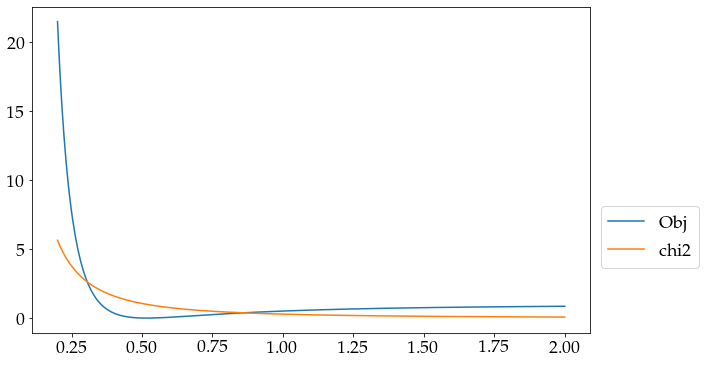

In [14]:
domain = np.linspace(0.2,2,400)
y = [objective(x) for x in domain]
y2 = [chi2(g_vec_free,x)/(143-66) for x in domain]

plt.figure(figsize=(10,6))
plt.plot(domain,y,label='Obj')
plt.plot(domain,y2,label='chi2')
plt.legend(loc = (1.02,0.2))
plt.show()

In [15]:
B_M1_th_unc = opt_result.x

In [16]:
from scipy.optimize import least_squares
opt = least_squares(chi2, x0=g_vec_free, args=[B_M1_th_unc])
g_vec_opt = opt.x

print(g_vec_opt)

[ 3.99033919 -1.71747098  1.08233822 -0.59699092]


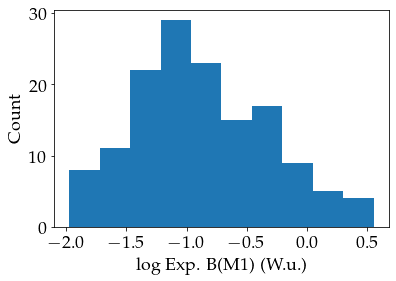

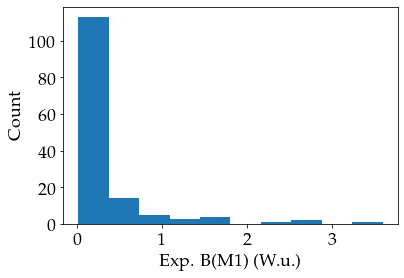

In [17]:
y = np.log10(np.array(df_usdb['B_exp (W.u.)']))
plt.hist(y, bins=10, density=False)
plt.xlabel('log Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()
plt.hist(np.array(df_usdb['B_exp (W.u.)']), bins=10, density=False)
plt.xlabel('Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()

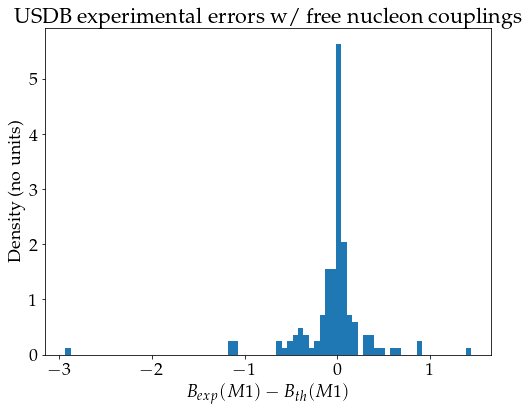

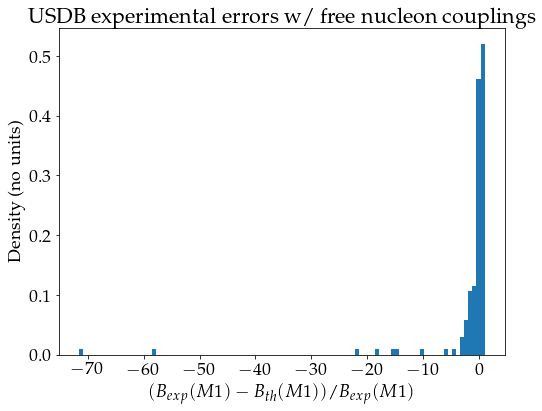

Average error with our model: -1.6257347152022545
std of errors: 8.235140893679631


In [18]:
B_exp = df_usdb['B_exp (W.u.)']
M_sp = np.array(df_usdb['Mth_sp'])
M_sn = np.array(df_usdb['Mth_sn'])
M_lp = np.array(df_usdb['Mth_lp'])
M_ln = np.array(df_usdb['Mth_ln'])
M_array = np.array([ M_sp,M_sn,M_lp,M_ln ])
B_err = np.array(B_exp - B_M1_Wu(B_th(g_vec_free,M_array)))
B_rel_err = B_err / B_exp

plt.figure(figsize=(8,6))
y = B_err
plt.hist(y,bins=optimal_n_bins(y),density=True)
plt.xlabel(r'$  B_{exp}(M1) - B_{th}(M1) $ ')
plt.ylabel('Density (no units)')
plt.title('USDB experimental errors w/ free nucleon couplings')
# plt.legend()
plt.show()


plt.figure(figsize=(8,6))
y = B_rel_err
plt.hist(y,bins=optimal_n_bins(y),density=True)
plt.xlabel(r'$ ( B_{exp}(M1) - B_{th}(M1) ) / B_{exp}(M1)$ ')
plt.ylabel('Density (no units)')
plt.title('USDB experimental errors w/ free nucleon couplings')
# plt.legend()
plt.show()


print(f'Average error with our model: {np.mean(y)}')

print(f'std of errors: {np.std(y)}')

In [19]:
df_usdb['B_th_free (W.u.)'] = B_M1_Wu(B_th(g_vec_free, np.array([ df_usdb['Mth_sp'], df_usdb['Mth_sn'], df_usdb['Mth_lp'], df_usdb['Mth_ln'] ])))
df_usdb['B_th_brown (W.u.)'] = B_M1_Wu(B_th(g_vec_brown, np.array([  df_usdb['Mth_sp'], df_usdb['Mth_sn'], df_usdb['Mth_lp'], df_usdb['Mth_ln']])))

In [20]:
df_usdb['B_rel_err_free'] = (df_usdb['B_exp (W.u.)'] - df_usdb['B_th_free (W.u.)'])/df_usdb['B_exp (W.u.)']
df_usdb['B_rel_err_brown'] = (df_usdb['B_exp (W.u.)'] - df_usdb['B_th_brown (W.u.)'])/df_usdb['B_exp (W.u.)']

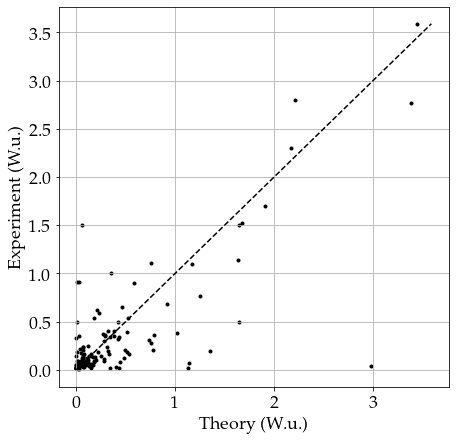

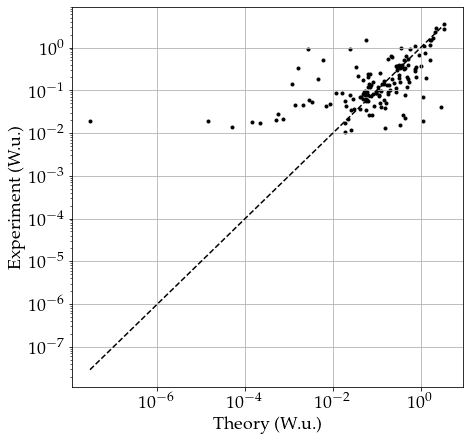

In [27]:
def make_scatter_plot(th,ex,log=False):
    fig = plt.figure(figsize=(7,7))
    ax = plt.gca()
    ax.scatter(th,ex,marker='.',color='k')
    ax.grid()
    if log:
        ax.set_yscale('log')
        ax.set_xscale('log')
        
    ax.set_xlabel('Theory (W.u.)')
    ax.set_ylabel('Experiment (W.u.)')
    
    lims = [min((min(th),min(ex))),max((max(th),max(ex)))]
#     ax.set_xlim(lims)
#     ax.set_ylim(lims)
    ax.plot(lims,lims,c='k',ls='--')
    
    plt.show()
    
make_scatter_plot(df_usdb['B_th_free (W.u.)'],df_usdb['B_exp (W.u.)'])
make_scatter_plot(df_usdb['B_th_free (W.u.)'],df_usdb['B_exp (W.u.)'],log=True)

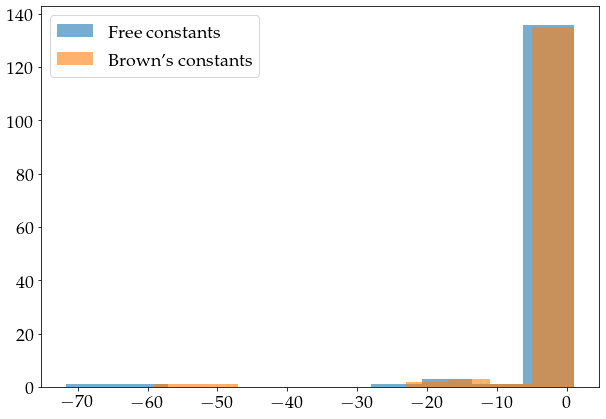

In [21]:
plt.figure(figsize=(10,7))
plt.hist(df_usdb['B_rel_err_free'],label='Free constants',alpha=0.6)
plt.hist(df_usdb['B_rel_err_brown'],label="Brown's constants",alpha=0.6)
plt.legend()
plt.show()

In [22]:
df_usdb['B_residual_free'] = (df_usdb['B_exp (W.u.)']  - df_usdb['B_th_free (W.u.)'] ) / np.sqrt( df_usdb['B_exp Unc (W.u.)']**2 + 0.515**2  ) 
df_usdb['B_residual_brown'] = (df_usdb['B_exp (W.u.)']  - df_usdb['B_th_brown (W.u.)'] ) / np.sqrt( df_usdb['B_exp Unc (W.u.)']**2 + 0.515**2  ) 

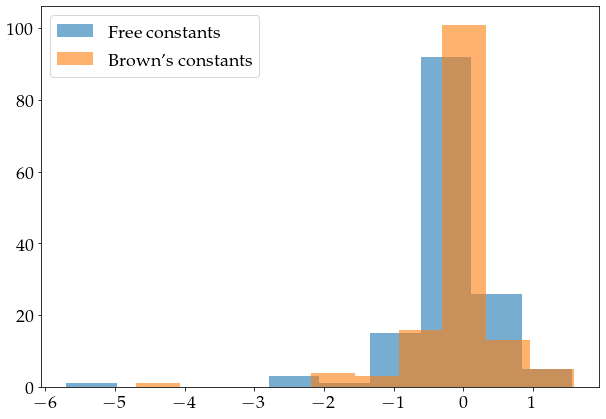

In [23]:
plt.figure(figsize=(10,7))
plt.hist(df_usdb['B_residual_free'],label='Free constants',alpha=0.6)
plt.hist(df_usdb['B_residual_brown'],label="Brown's constants",alpha=0.6)
plt.legend()
plt.show()

In [24]:
df_usdb['B_residual_free (Abs)'] = np.abs(df_usdb['B_residual_free'])
df_usdb['B_residual_brown (Abs)']= np.abs(df_usdb['B_residual_brown'])

In [25]:
df_usdb.sort_values(by='B_rel_err_brown')

,Index,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln,B_th_free (W.u.),B_th_brown (W.u.),B_rel_err_free,B_rel_err_brown,B_residual_free,B_residual_brown,B_residual_free (Abs),B_residual_brown (Abs)
22,31,18,F,9,9,6385.5000,1.7000,2,0.49 KEV 0.09,2270.0000,0.0000,2.300,0.500,M1,0.0410,0.0200,4,0.49,KEV,0.09,9.310806e-19,5.069216e-18,0.073410,0.035810,18F,3,6,6,3,True,-0.2563,0.2563,0.1038,-0.1038,2.977180e+00,2.464072e+00,-71.614143,-59.099305,-5.697026,-4.701449,5.697026,4.701449
7,15,18,F,9,9,5297.6000,1.5000,4,21 FS 3,646.0000,0.0000,1.300,0.300,M1,0.0190,0.0090,8,21.00,FS,3.00,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1606,0.1606,0.0920,-0.0920,1.125794e+00,9.186168e-01,-58.252309,-47.348252,-2.148786,-1.746562,2.148786,1.746562
34,45,19,F,9,10,6282.0000,2.0000,5/2,2.4 KEV,4728.0000,0.0000,20.000,2.000,M1,0.0220,0.0050,5,2.40,KEV,0.00,1.900956e-19,NaN,0.039391,0.008952,19F,3/2,3,5,1,True,0.0569,-0.0569,0.3407,-0.3407,4.289394e-01,4.734294e-01,-18.497243,-20.519518,-0.790136,-0.876521,0.790136,0.876521
60,71,21,Ne,10,11,4684.5300,0.1500,3/2,11 FS 3,4333.3500,0.2500,100.000,3.000,M1,0.0150,0.0050,3,11.00,FS,3.00,1.100000e-14,3.000000e-15,0.026857,0.008952,21Ne,5/2,5,2,1,True,-0.0133,-0.1975,0.1017,0.1092,3.425992e-01,3.064779e-01,-21.839947,-19.431861,-0.636085,-0.565950,0.636085,0.565950
55,66,21,F,9,12,1730.4000,0.0600,3/2,0.05 PS 0.04,1450.5000,0.2000,22.000,2.500,[M1],0.0260,0.0210,3,0.05,PS,0.04,5.000000e-14,4.000000e-14,0.046553,0.037600,21F,1/2,1,1,1,True,0.0804,-0.0097,0.3630,-0.4337,4.028770e-01,4.608430e-01,-14.495268,-16.724731,-0.731192,-0.843654,0.731192,0.843654
54,65,21,F,9,12,1730.4000,0.0600,3/2,0.05 PS 0.04,1730.2800,0.0800,100.000,2.500,[M1],0.0700,0.0600,3,0.05,PS,0.04,5.000000e-14,4.000000e-14,0.125335,0.107430,21F,5/2,5,1,1,True,0.2161,-0.0103,0.1842,-0.3900,1.143490e+00,1.091952e+00,-15.335572,-14.599310,-2.070443,-1.971041,2.070443,1.971041
51,62,20,F,9,11,3488.4100,0.0300,1,8.1 FS 0.5,2431.4300,0.9900,7.100,2.900,[M1],0.0132,0.0055,2,8.10,FS,0.50,8.100000e-15,5.000000e-16,0.023635,0.009848,20F,1,2,3,1,True,-0.0578,-0.0161,-0.2603,0.3342,1.519634e-01,1.829638e-01,-10.512377,-12.860894,-0.269428,-0.329620,0.269428,0.329620
32,43,19,F,9,10,6070.0000,1.0000,7/2,1.2 KEV,3290.0000,0.0000,23.000,3.000,M1,0.1900,0.0700,7,1.20,KEV,0.00,3.801912e-19,NaN,0.340194,0.125335,19F,9/2,9,3,1,True,-0.2667,0.0097,-0.0304,0.2874,1.354714e+00,1.205630e+00,-6.130074,-5.345420,-2.240975,-1.954128,2.240975,1.954128
65,77,22,Na,11,11,4319.0000,0.5000,1,17 FS 10,3662.0000,0.0000,100.000,0.000,M1,0.0260,0.0160,2,17.00,FS,10.00,1.700000e-14,1.000000e-14,0.046553,0.028648,22Na,0,0,4,1,True,0.0043,-0.0043,0.3288,-0.3288,7.617962e-02,1.121658e-01,-1.929985,-3.314069,-0.097389,-0.167232,0.097389,0.167232
164,199,34,Cl,17,17,2580.4000,0.2000,1,33 FS 8,2580.3000,0.0000,100.000,0.000,M1,0.0380,0.0100,2,33.00,FS,8.00,3.300000e-14,8.000000e-15,0.068039,0.017905,34Cl,0,0,3,1,True,-0.0393,0.0393,-0.1513,0.1513,1.517546e-01,1.574511e-01,-2.993541,-3.143450,-0.220841,-0.231900,0.220841,0.231900


In [26]:
with open('M1_USDB_sorted_on_residual.csv','w') as fh:
    df_usdb.sort_values(by='B_residual_brown (Abs)').to_csv(fh)

In [27]:
with open('M1_transitions_USDB.csv','w') as fh:
    df_usdb.to_csv(fh)